In [1]:
!pip install scapy pandas matplotlib

In [3]:
from scapy.all import sniff, IP, TCP, UDP
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [5]:
# List to store captured packets
packet_data = []

def packet_callback(packet):
    if packet.haslayer(IP):
        packet_info = {
            "Source": packet[IP].src,
            "Destination": packet[IP].dst,
            "Protocol": "TCP" if packet.haslayer(TCP) else "UDP" if packet.haslayer(UDP) else "Other",
            "Length": len(packet),
        }
        packet_data.append(packet_info)

# Start packet sniffing (Requires Admin/root privileges)
print("Starting packet capture...")
sniff(prn=packet_callback, store=False, count=50)  # Capture 50 packets
print("Packet capture completed.")


Starting packet capture...
Packet capture completed.


In [7]:
# Create a DataFrame
df = pd.DataFrame(packet_data)

# Display first 5 records
df.head()


Source      Destination Protocol  Length
0   10.10.12.69  239.255.255.250      UDP     546
1  10.10.11.155  239.255.255.250      UDP     167
2  192.168.5.54          1.1.1.1      UDP     100
3  192.168.5.54          1.1.1.1      UDP     100
4       1.1.1.1     192.168.5.54      UDP     116

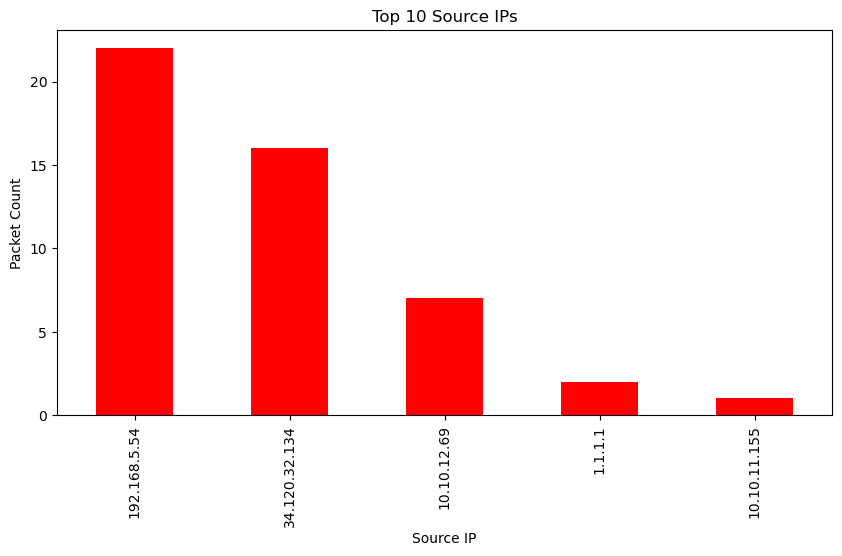

In [9]:
source_counts = df["Source"].value_counts().head(10)
source_counts.plot(kind="bar", color="red", title="Top 10 Source IPs", figsize=(10,5))
plt.xlabel("Source IP")
plt.ylabel("Packet Count")
plt.show()
